In [1]:
import os
print("Number of samples COVID-19 for training",len(os.listdir("data/TRAIN/COVID-19")))
print("Number of samples Healthy for training",len(os.listdir("data/TRAIN/Healthy")))
print("Number of samples COVID-19 for validation",len(os.listdir("data/VAL/COVID-19")))
print("Number of samples Healthy for validation",len(os.listdir("data/VAL/Healthy")))

Number of samples COVID-19 for training 20
Number of samples Healthy for training 19
Number of samples COVID-19 for validation 5
Number of samples Healthy for validation 5


In [5]:
train_dir = "data/TRAIN"
validation_dir = "data/VAL"
Test_dir = "data/TEST"

In [6]:
from keras.src.layers import MaxPooling2D, Conv2D, Flatten, Dense
# Implémenter la convolution, pooling, relu et le fully connected
from keras import models  # Pour créer le sochle qui va transporeter CNN - sequential()

model = models.Sequential() # préparer le support de l'architecture CNN
# Conception de l'architecture
# Couche de convolution 1 + Relu
# 64 filtres de taille 3*3

model.add(Conv2D(256, (3, 3), activation='relu',
                 input_shape=(224, 224, 3)))
'''
Number de features map 64 car on a 64 filtres
Size= 1 + (Inputsize + 2*padding) - kerenl size/Stride AN. Size=1 + (227+2*0)-3/1 = 1+224 = 225
'''
model.add(MaxPooling2D((2, 2)))
'''
Number = 64 filtres
size = N taille input / 2= 225/2=112
'''


model.add(Conv2D(64, (7, 7), activation='relu'))
#Size=1 + (112+2*0)-3/1 = 1+109 = 110
model.add(MaxPooling2D((2, 2)))




model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\inest\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 105, 105, 64)   │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 52, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    88,605,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,546,817 (341.59 MB)

 Trainable params: 89,546,817 (341.59 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.8,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')
Val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=2,
    class_mode='binary')
validation_generator = Val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=2,
    class_mode='binary')

Found 39 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [12]:

from keras.src.optimizers import Adam
from keras.src.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)  # Updated extension
callbacks = [early_stopping, model_checkpoint]
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/20
 6/20 ━━━━━━━━━━━━━━━━━━━━ 10s 734ms/step - accuracy: 0.6208 - loss: 0.6900

KeyboardInterrupt: 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


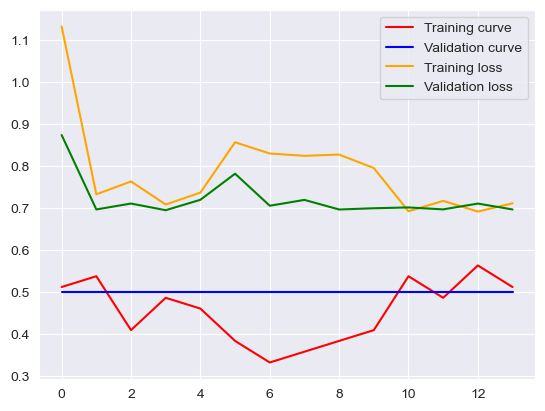

In [10]:
import matplotlib.pyplot as plt # Bibliothèque de représentation des courbes
print(history.history.keys())
plt.figure()
plt.plot(history.history['accuracy'], 'red', label='Training curve')
plt.plot(history.history['val_accuracy'], 'blue', label='Validation curve')
plt.plot(history.history['loss'], 'orange', label='Training loss')
plt.plot(history.history['val_loss'], 'green', label='Validation loss')
plt.legend()
plt.show()

In [11]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(validation_generator)
y_pred=np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step
Confusion Matrix
[[5 0]
 [5 0]]
Classification Report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       0.00      0.00      0.00         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10



C:\Users\inest\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\inest\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\inest\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
